# Diskrete Mathematik

Python bietet diverse Funktionen, um grundlegende Konzepte aus der Kombinatorik umzusetzen.
Zum Beispiel lassen sich alle Kombinationen von zwei oder mehr Mengen mittels der Funktion `product` bilden, oder geordnete Auswahlen aus einer Liste mit oder ohne zurücklegen treffen.

Dokumentation: [itertools](https://docs.python.org/2/library/itertools.html)

Für die folgenden Beispiele definieren wir uns die folgenden zwei diskrete Mengen (eine Liste ist OK)

In [6]:
animals = ["cat", "dog", "fish"]
owners = ["susi", "tim", "franziska", "henry"]

## Produktbildung

Alle Kombinationen durchprobieren

In [7]:
from itertools import product
for animal, owner in product(animals, owners):
    print "%-5s belongs to %-10s" % (animal, owner)

SyntaxError: invalid syntax (<ipython-input-7-5e3a61fc61bb>, line 3)

## Kombinationen aus einer Menge ziehen

In [8]:
# Ziehe 1 ...
from itertools import combinations
for owner1 in combinations(owners, 1):
    print("%-10s" % (owner1))

susi      
tim       
franziska 
henry     


In [9]:
# ... ziehe 2 ...
from itertools import combinations
for owner1, owner2 in combinations(owners, 2):
    print("%-10s %-10s" % (owner1, owner2))

susi       tim       
susi       franziska 
susi       henry     
tim        franziska 
tim        henry     
franziska  henry     


In [10]:
# ... oder 3 ....
from itertools import combinations
for owner1, owner2, owner3 in combinations(owners, 3):
    print("%-10s %-10s %-10s" % (owner1, owner2, owner3))

susi       tim        franziska 
susi       tim        henry     
susi       franziska  henry     
tim        franziska  henry     


In [11]:
# ... oder gar 4!
from itertools import combinations
for owner1, owner2, owner3, owner4 in combinations(owners, 4):
    print("%-10s %-10s %-10s %-10s" % (owner1, owner2, owner3, owner4))

susi       tim        franziska  henry     


## Kombinationen mit Zurücklegen

In [12]:
from itertools import combinations_with_replacement
for owner1, owner2 in combinations_with_replacement(owners, 2):
    print("%-10s %-10s" % (owner1, owner2))

susi       susi      
susi       tim       
susi       franziska 
susi       henry     
tim        tim       
tim        franziska 
tim        henry     
franziska  franziska 
franziska  henry     
henry      henry     


## Permutationen

In [13]:
from itertools import permutations
for owner1, owner2 in permutations(owners, 2):
    print("%-10s %-10s" % (owner1, owner2))

susi       tim       
susi       franziska 
susi       henry     
tim        susi      
tim        franziska 
tim        henry     
franziska  susi      
franziska  tim       
franziska  henry     
henry      susi      
henry      tim       
henry      franziska 


In [14]:
from itertools import permutations
for owner1, owner2, owner3 in permutations(owners, 3):
    print("%-10s %-10s %-10s" % (owner1, owner2, owner3))

susi       tim        franziska 
susi       tim        henry     
susi       franziska  tim       
susi       franziska  henry     
susi       henry      tim       
susi       henry      franziska 
tim        susi       franziska 
tim        susi       henry     
tim        franziska  susi      
tim        franziska  henry     
tim        henry      susi      
tim        henry      franziska 
franziska  susi       tim       
franziska  susi       henry     
franziska  tim        susi      
franziska  tim        henry     
franziska  henry      susi      
franziska  henry      tim       
henry      susi       tim       
henry      susi       franziska 
henry      tim        susi      
henry      tim        franziska 
henry      franziska  susi      
henry      franziska  tim       


## Graphen

[NetworkX](https://networkx.github.io/) ist eine der am weitesten verbreiteten Python-Bibliotheken für Graphentheorie
mit einer [Menge von Algorithmen](http://networkx.github.io/documentation/latest/reference/algorithms.html).


[NetworkX Dokumentation](http://networkx.github.io/documentation/networkx-1.9.1/)

(Eine andere Pythonbibliothek wäre [SageMath / Graph Theory](http://doc.sagemath.org/html/en/reference/graphs/index.html))

Ein Graph ist eine Menge von Knoten und Kanten (Vertices and Edges),
wobei die Kanten für Verbindungen zwischen den Knoten stehen.
Es gibt ungerichtete und gerichtete Verbindungen -- letzteres ist dann ein "gerichteter Graph".
Eine Implementierung im Computer besteht nun darin,
in einer Datenstruktur diese Kanten und Knoten effizient zu verwalten
und dann darauf aufbauend Algorithmen aus der Graphentheorie anzuwenden.

Bemerkung: Falls die Bibliothek `networkx` nicht installiert sein sollte, so kann man dies entweder in der Kommandozeile oder in Canopy unter Tools &rarr; Canopy Terminal mittels

    pip install networkx
    
nachholen.

In [15]:
import networkx as nx
%matplotlib inline
nx.__version__

'1.11'

Hier wird ein einfacher Graph instanziert. Die Knoten sind einige Hauptstädte, die Kanten stellen (Zug-) Verbindungen zwischen ihnen dar. 

In [21]:
g1 = nx.Graph()

g1.add_node("Wien")
g1.add_node("Graz")
g1.add_node("Linz")
g1.add_node("Salzburg")
g1.add_node("Innsbruck")
g1.add_node("Villach")
g1.add_node("St. Pölten")

g1.add_edge("Graz", "Salzburg")
g1.add_edge("Wien", "Salzburg")
g1.add_path(["Wien", "Graz", "Linz", "Salzburg", "Innsbruck"])
g1.add_path(["St. Pölten", "Villach", "Graz"])

Plot des Graphen, wobei mit `spring_layout` eine gleichmäßig verteilte Positionierung der Knoten berechnet wird.
Anschließend werden nicht nur die Knoten und Kanten,
sondern auch die Namen der Knoten geplottet.

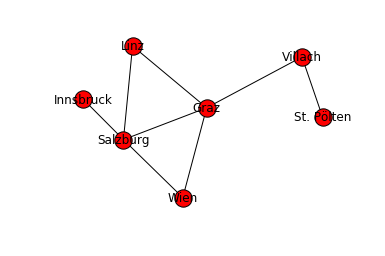

In [22]:
%matplotlib inline
pos = nx.spring_layout(g1)
nx.draw_networkx_labels(g1, pos, font_size = 12)
nx.draw(g1, pos)

Ausgehend von diesem Graph lassen sich einige Kennzahlen und Parameter ausrechnen:

Ist er zusammenhängend?

In [23]:
nx.is_connected(g1)

True

Grad von Graz

In [24]:
nx.degree(g1, "Graz")

4

Durchmesser des ganzen Graphs

In [25]:
nx.diameter(g1)

4

Exzentrizität

In [26]:
nx.eccentricity(g1)

{'Graz': 2,
 'Innsbruck': 4,
 'Linz': 3,
 'Salzburg': 3,
 'St. Pölten': 4,
 'Villach': 3,
 'Wien': 3}

Kürzester Weg von Linz nach Innsbruck

In [27]:
nx.shortest_path(g1, "Linz", "Innsbruck")

['Linz', 'Salzburg', 'Innsbruck']

Es gibt außerdem eine große Bibliothek für Graphen.
Hier wird ein Dodekaedergraph geladen und der 10-te Knoten entfernt.

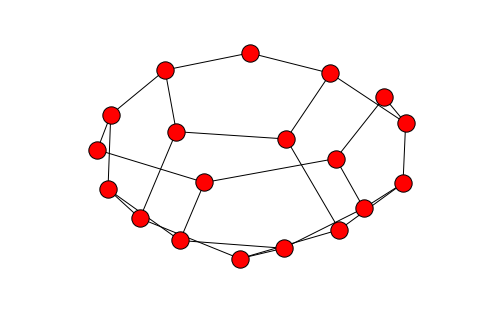

In [28]:
g2=nx.dodecahedral_graph()
g2.remove_node(10)
nx.draw(g2)

Durchmesser

In [29]:
nx.diameter(g2)

5

Vergleich der Dichte beider Graphen:

In [30]:
nx.density(g1), nx.density(g2)

(0.38095238095238093, 0.15789473684210525)

Histogramdaten für die Grade aller Knoten:

In [31]:
nx.degree_histogram(g2)

[0, 0, 3, 16]

### Gerichteter Graph

Ein **gerichteter Graph** für die Wörter in einem Text.

In [32]:
text = '''11:15 Restate my assumptions:
1. Mathematics is the language of nature.
2. Everything around us can be represented and understood through numbers. 
3. If you graph these numbers, patterns emerge.
Therefore: There are patterns everywhere in nature.'''

In [33]:
import re
words = re.compile(r'[a-zA-Z]+')
tokens = words.findall(text)

In [34]:
text_digraph = nx.MultiDiGraph()
for t1, t2 in zip(tokens[:-1], tokens[1:]):
    text_digraph.add_edge(t1, t2)

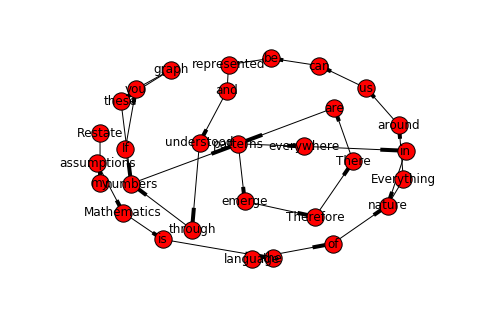

In [35]:
%matplotlib inline
nx.draw(text_digraph, with_labels = True)

In [36]:
nx.shortest_path(text_digraph, "Everything", "numbers")

['Everything',
 'around',
 'us',
 'can',
 'be',
 'represented',
 'and',
 'understood',
 'through',
 'numbers']

### Baum (Tree)

Ein Baum startet bei einem Wurzelknoten und verästelt sich ohne Schleifen zu bilden.
Knoten ohne Kinder werden Blätter genannt.

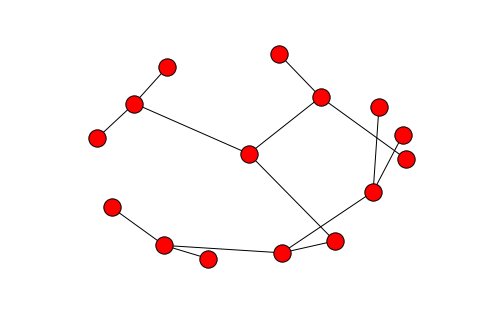

In [37]:
rtree = nx.balanced_tree(2, 3)
%matplotlib inline
nx.draw(rtree)

In [38]:
nx.is_tree(rtree)

True

Liste der Blätter-Knoten (Grad ist 1)

In [40]:
[ k for k, v in nx.degree(rtree).items() if v == 1]

[7, 8, 9, 10, 11, 12, 13, 14]